In [4]:
%pylab inline

from collections import Counter
from collections import defaultdict
import pandas as pd

from soln.dataset import generate_xv_splits
from soln.dataset import get_augmented_train_and_test_set
from soln.dataset import inverse_log_transform_y
from soln.utils import get_fixed_and_var_cost
from soln.utils import print_brackets

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
aug_train_set, aug_test_set = get_augmented_train_and_test_set()
X_train, y_train, X_test, y_test = next(generate_xv_splits(aug_train_set))

In [24]:
raw['train_set'].supplier.value_counts()[:10]

S-0066    20553
S-0041     3323
S-0072     2317
S-0054      838
S-0026      727
S-0013      554
S-0058      516
S-0064      446
S-0062      264
S-0014      139
dtype: int64

In [25]:
raw['test_set'].supplier.value_counts()[:10]

S-0066    20547
S-0041     3128
S-0072     2336
S-0054      961
S-0026      784
S-0013      612
S-0058      523
S-0064      444
S-0062      232
S-0014      124
dtype: int64

In [26]:
X_train.supplier.value_counts()[:10]

S-0066    17503
S-0041     3188
S-0072     2024
S-0054      766
S-0026      663
S-0013      544
S-0058      515
S-0064      323
S-0062      190
S-0030       94
dtype: int64

In [27]:
X_test.supplier.value_counts()[:10]

S-0066    3050
S-0072     293
S-0041     135
S-0064     123
S-0062      74
S-0054      72
S-0026      64
S-0014      46
S-0030      17
S-0013      10
dtype: int64

In [130]:
print_brackets(raw['train_set'], 20)

brackets (1,): count 2945 frac 0.332580463015 cum_frac 0.332580463015
brackets (1, 2, 5, 10, 25, 50, 100, 250): count 2194 frac 0.247769621683 cum_frac 0.580350084698
brackets (1, 6, 20): count 662 frac 0.0747600225861 cum_frac 0.655110107284
brackets (1, 1): count 286 frac 0.032298136646 cum_frac 0.68740824393
brackets (5,): count 173 frac 0.0195369847544 cum_frac 0.706945228684
brackets (20,): count 171 frac 0.0193111236589 cum_frac 0.726256352343
brackets (10,): count 144 frac 0.0162619988707 cum_frac 0.742518351214
brackets (5, 19, 20): count 109 frac 0.0123094297007 cum_frac 0.754827780915
brackets (25,): count 100 frac 0.0112930547713 cum_frac 0.766120835686
brackets (1, 2, 3, 5, 10, 20): count 84 frac 0.00948616600791 cum_frac 0.775607001694
brackets (1, 2, 5, 10, 25, 50, 100): count 67 frac 0.00756634669678 cum_frac 0.783173348391
brackets (50,): count 63 frac 0.00711462450593 cum_frac 0.790287972897
brackets (2,): count 62 frac 0.00700169395822 cum_frac 0.797289666855
brackets

In [9]:
train[train.quantity == 19].supplier.value_counts()

S-0041    110
S-0054      2
S-0013      1
dtype: int64

In [126]:
print_brackets(raw['test_set'], 20)

brackets (1,): count 2995 frac 0.0990573838267 cum_frac 0.0990573838267
brackets (1, 2, 5, 10, 25, 50, 100, 250): count 2185 frac 0.0722672399537 cum_frac 0.17132462378
brackets (1, 6, 20): count 623 frac 0.020605258806 cum_frac 0.191929882586
brackets (1, 1): count 272 frac 0.00899619646106 cum_frac 0.200926079047
brackets (20,): count 195 frac 0.00644947908054 cum_frac 0.207375558128
brackets (5,): count 151 frac 0.00499421200595 cum_frac 0.212369770134
brackets (10,): count 148 frac 0.00489498925087 cum_frac 0.217264759385
brackets (5, 19, 20): count 92 frac 0.00304283115595 cum_frac 0.220307590541
brackets (25,): count 91 frac 0.00300975690425 cum_frac 0.223317347445
brackets (1, 2, 3, 5, 10, 20): count 76 frac 0.00251364312882 cum_frac 0.225830990574
brackets (2,): count 72 frac 0.00238134612204 cum_frac 0.228212336696
brackets (50,): count 72 frac 0.00238134612204 cum_frac 0.230593682818
brackets (1, 2, 5, 10, 25, 50, 100): count 62 frac 0.00205060360509 cum_frac 0.232644286423
b

In [31]:
df = X_train
df = df.set_index('tube_assembly_id')

taid_to_quantities = defaultdict(list)
for taid, quantity in df['quantity'].iteritems():
    taid_to_quantities[taid].append(quantity)

quantities_ctr = Counter()
for taid in taid_to_quantities:
    taid_to_quantities[taid].sort()
    quantities_ctr[tuple(taid_to_quantities[taid])] += 1

for item in quantities_ctr.most_common(20):
    print item

((1,), 2672)
((1, 2, 5, 10, 25, 50, 100, 250), 1860)
((1, 6, 20), 637)
((1, 1), 261)
((5,), 169)
((20,), 169)
((10,), 139)
((5, 19, 20), 106)
((25,), 89)
((1, 2, 3, 5, 10, 20), 79)
((1, 2, 5, 10, 25, 50, 100), 62)
((2,), 61)
((50,), 56)
((15,), 51)
((40,), 47)
((3,), 42)
((35,), 41)
((30,), 36)
((5, 10, 15), 35)
((1, 3, 5, 7, 9), 33)


In [32]:
df = X_test
df = df.set_index('tube_assembly_id')

taid_to_quantities = defaultdict(list)
for taid, quantity in df['quantity'].iteritems():
    taid_to_quantities[taid].append(quantity)

quantities_ctr = Counter()
for taid in taid_to_quantities:
    taid_to_quantities[taid].sort()
    quantities_ctr[tuple(taid_to_quantities[taid])] += 1

for item in quantities_ctr.most_common(20):
    print item

((1, 2, 5, 10, 25, 50, 100, 250), 334)
((1,), 273)
((1, 1), 25)
((1, 6, 20), 25)
((25,), 11)
((5, 10, 15, 20), 9)
((2, 4, 6, 8), 9)
((1, 2, 3, 4), 8)
((50,), 7)
((3, 6, 9, 12), 7)
((1, 2, 5, 10, 25, 50), 6)
((1, 2, 3, 4, 5), 6)
((2, 3, 4, 5), 6)
((10,), 5)
((1, 2, 3, 5, 10, 20), 5)
((1, 2, 5, 10, 25, 50, 100), 5)
((3,), 5)
((30,), 5)
((1, 1, 1), 5)
((75,), 4)


In [131]:
df = X_train
df = df.set_index('tube_assembly_id')

taid_to_quantities = defaultdict(list)
for taid, quantity in df['quantity'].iteritems():
    taid_to_quantities[taid].append(quantity)

taids = []
for taid, quantities in taid_to_quantities.iteritems():
    # if quantities == [1, 1]:
    # if quantities == [1, 2, 5, 10, 25, 50, 100, 250]:
    # if quantities == [1, 6, 20]:
    # if quantities == [5, 19, 20]:
    # if quantities == [1, 2, 3, 5, 10, 20]:
    if quantities == [5]:
        taids.append(taid)

taids.sort()
print len(taids)
taids

169


['TA-02050',
 'TA-02188',
 'TA-02459',
 'TA-02643',
 'TA-02644',
 'TA-02666',
 'TA-02907',
 'TA-03943',
 'TA-04804',
 'TA-04807',
 'TA-04979',
 'TA-05101',
 'TA-05486',
 'TA-05702',
 'TA-05857',
 'TA-05879',
 'TA-06138',
 'TA-06141',
 'TA-06169',
 'TA-06534',
 'TA-06586',
 'TA-06691',
 'TA-06807',
 'TA-06997',
 'TA-07097',
 'TA-07100',
 'TA-07138',
 'TA-07232',
 'TA-07236',
 'TA-07262',
 'TA-07263',
 'TA-07457',
 'TA-07520',
 'TA-07547',
 'TA-07608',
 'TA-07618',
 'TA-07644',
 'TA-07891',
 'TA-08211',
 'TA-08236',
 'TA-08238',
 'TA-08241',
 'TA-08286',
 'TA-08366',
 'TA-08758',
 'TA-08798',
 'TA-08814',
 'TA-08945',
 'TA-08988',
 'TA-09649',
 'TA-09650',
 'TA-09691',
 'TA-09693',
 'TA-09795',
 'TA-09806',
 'TA-09814',
 'TA-09903',
 'TA-10068',
 'TA-10073',
 'TA-10074',
 'TA-10075',
 'TA-10080',
 'TA-10092',
 'TA-10211',
 'TA-10272',
 'TA-10355',
 'TA-10379',
 'TA-10455',
 'TA-10456',
 'TA-10549',
 'TA-10550',
 'TA-10560',
 'TA-10565',
 'TA-10885',
 'TA-10893',
 'TA-10897',
 'TA-10996',

In [30]:
df = aug_train_set.copy()
taid = 'TA-10796'
df = df[aug_train_set.tube_assembly_id == taid]
df

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,log_cost,material_id,diameter,...,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,dev_fold
16549,TA-10796,S-0066,2013-09-01,0,0,True,1,2.911842,SP-0029,19.05,...,0,0,0,[],[],41516,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16550,TA-10796,S-0066,2013-09-01,0,0,True,2,2.350915,SP-0029,19.05,...,0,0,0,[],[],41516,2,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16551,TA-10796,S-0066,2013-09-01,0,0,True,5,1.750472,SP-0029,19.05,...,0,0,0,[],[],41516,5,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16552,TA-10796,S-0066,2013-09-01,0,0,True,10,1.429620,SP-0029,19.05,...,0,0,0,[],[],41516,10,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16553,TA-10796,S-0066,2013-09-01,0,0,True,25,1.172857,SP-0029,19.05,...,0,0,0,[],[],41516,25,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16554,TA-10796,S-0066,2013-09-01,0,0,True,50,1.092200,SP-0029,19.05,...,0,0,0,[],[],41516,50,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16555,TA-10796,S-0066,2013-09-01,0,0,True,100,1.055122,SP-0029,19.05,...,0,0,0,[],[],41516,100,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6
16556,TA-10796,S-0066,2013-09-01,0,0,True,250,1.032593,SP-0029,19.05,...,0,0,0,[],[],41516,250,True,"(1, 2, 5, 10, 25, 50, 100, 250)",6


15.7064395247 1.65988563016 0.999909009609


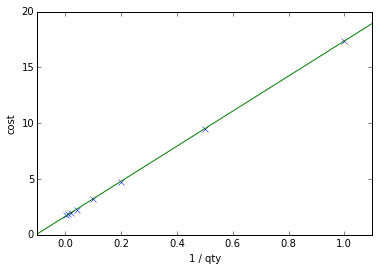

In [31]:
quantities = df.quantity.values
costs = inverse_log_transform_y(df.log_cost.values)
fixed_cost, var_cost, r2 = get_fixed_and_var_cost(quantities, costs)
print fixed_cost, var_cost, r2

plt.plot(1.0 / quantities, costs, 'x')
plt.xlabel('1 / qty')
plt.ylabel('cost')
plt.xlim(-0.1, 1.1)
xx = np.linspace(-0.1, 1.1, 100)
yy = fixed_cost * xx + var_cost
plt.plot(xx, yy)

In [132]:
X_train[:5]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,TA-01609,S-0014,2000-12-21,0,0,Yes,26
1,TA-01609,S-0014,2000-12-21,0,0,Yes,52
2,TA-01609,S-0014,2000-12-21,0,0,Yes,104
3,TA-01641,S-0072,2013-02-25,3,1,Yes,1
4,TA-01743,S-0066,2011-05-13,4,0,Yes,2


In [145]:
grouped = X_train.groupby(['tube_assembly_id', 'supplier', 'quote_date'])
for t_s_q, indices in grouped.groups.iteritems():
    print t_s_q, indices, len(indices)

('TA-11183', 'S-0066', '2011-08-01') [13500] 1
('TA-13034', 'S-0013', '2010-01-01') [14981] 1
('TA-01609', 'S-0014', '2000-12-21') [0, 1, 2] 3
('TA-05310', 'S-0072', '2001-05-17') [5291] 1
('TA-10717', 'S-0072', '2014-07-01') [12512, 12513, 12514, 12515] 4
('TA-19133', 'S-0066', '2013-06-01') [21173, 21174, 21175, 21176, 21177, 21178, 21179, 21180] 8
('TA-16065', 'S-0041', '2013-04-08') [17644] 1
('TA-03071', 'S-0066', '2013-08-01') [1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589] 8
('TA-05332', 'S-0066', '2001-10-05') [5297] 1
('TA-02601', 'S-0041', '2013-08-05') [831] 1
('TA-20441', 'S-0066', '2013-10-01') [24318, 24319, 24320, 24321, 24322, 24323, 24324, 24325] 8
('TA-15392', 'S-0013', '2013-03-08') [17120] 1
('TA-19525', 'S-0030', '2014-02-12') [22160] 1
('TA-02222', 'S-0026', '2013-02-12') [262, 263, 264, 265] 4
('TA-13270', 'S-0005', '2013-08-28') [15169] 1
('TA-15648', 'S-0041', '2013-04-24') [17311] 1
('TA-16158', 'S-0066', '2011-07-14') [17704] 1
('TA-20690', 'S-0066', '2013-0

In [164]:
X_train_ext = get_extended_X(X_train, raw)

from soln.featurizer import CustomFeaturizer

featurizer = CustomFeaturizer()
featurizer.fit(X_train_ext)
X_train_feats = featurizer.transform(X_train_ext, include_taid=True)
X_train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26311 entries, 0 to 26310
Columns: 312 entries, supplier other to adj_bracketing
dtypes: bool(82), float64(221), int64(8), object(1)
memory usage: 48.4+ MB


In [173]:
df = X_train_feats[['tube_assembly_id', 'bracket_pricing', 'adj_bracketing']]
print df.count()
df[(df.bracket_pricing == True) & (df.adj_bracketing == False)].count()

tube_assembly_id    26311
bracket_pricing     26311
adj_bracketing      26311
dtype: int64


tube_assembly_id    695
bracket_pricing     695
adj_bracketing      695
dtype: int64

In [5]:
# Compute fixed cost and variable cost for the well-behaved bracket.
brapa = (1, 2, 5, 10, 25, 50, 100, 250)
df = aug_train_set[aug_train_set.bracketing_pattern == brapa]
grouped = df.groupby('tube_assembly_id')
taids = []
fixed_costs = []
var_costs = []
for taid, indices in grouped.groups.iteritems():
    quantities = df.quantity[indices].values
    costs = inverse_log_transform_y(df.log_cost[indices].values)
    fixed_cost, var_cost, r2 = get_fixed_and_var_cost(quantities, costs)
    if r2 < 0.9999:
        print "{} has bad r2".format(taid)
    taids.append(taid)
    fixed_costs.append(fixed_cost)
    var_costs.append(var_cost)

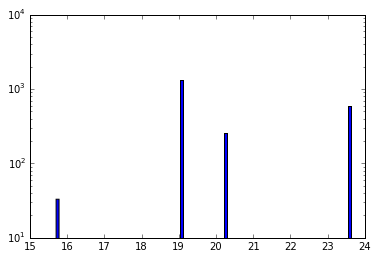

In [6]:
plt.hist(fixed_costs, bins=100, log=True);

In [7]:
from bisect import bisect
sorted_fixed_costs = list(sorted(fixed_costs))
cutoff_1 = bisect(sorted_fixed_costs, 17.5)
cutoff_2 = bisect(sorted_fixed_costs, 19.75)
cutoff_3 = bisect(sorted_fixed_costs, 22.0)
fc_clu_1 = sorted_fixed_costs[0:cutoff_1]
fc_clu_2 = sorted_fixed_costs[cutoff_1:cutoff_2]
fc_clu_3 = sorted_fixed_costs[cutoff_2:cutoff_3]
fc_clu_4 = sorted_fixed_costs[cutoff_3:]

for clu in (fc_clu_1, fc_clu_2, fc_clu_3, fc_clu_4):
    s = pd.Series(clu)
    print s.describe()

count    33.000000
mean     15.704975
std       0.001228
min      15.703115
25%      15.703851
50%      15.705284
75%      15.706440
max      15.706440
dtype: float64
count    1319.000000
mean       19.043385
std         0.001066
min        19.041437
25%        19.042174
50%        19.043606
75%        19.044762
max        19.044762
dtype: float64
count    257.000000
mean      20.295284
std        0.000985
min       20.292854
25%       20.295055
50%       20.295746
75%       20.296179
max       20.296179
dtype: float64
count    596.000000
mean      23.633726
std        0.000911
min       23.631919
25%       23.632655
50%       23.633378
75%       23.634501
max       23.635243
dtype: float64


In [8]:
taid_fc = pd.DataFrame({'tube_assembly_id': taids, 'fixed_cost': fixed_costs})
fc_vals = [15.704975, 19.043385, 20.295284, 23.633726]
fc_class = -1 * np.ones(len(taid_fc), dtype=np.int)
for i, fc_val in enumerate(fc_vals):
    indices = np.abs(taid_fc.fixed_cost.values - fc_val) < 0.1
    fc_class[indices] = i
print np.unique(fc_class)
assert np.all(np.unique(fc_class) == [0, 1, 2, 3])
taid_fc['fixed_cost_class'] = fc_class
taid_fc.pop('fixed_cost')
taid_fc.to_csv('taid_fc.csv', index=False)
taid_fc

[0 1 2 3]


,tube_assembly_id,fixed_cost_class
0,TA-18908,1
1,TA-18906,1
2,TA-18907,1
3,TA-18902,1
4,TA-18903,1
5,TA-11035,1
6,TA-03099,2
7,TA-21113,1
8,TA-21116,1
9,TA-03656,1


In [9]:
X_train_bra = X_train[X_train.bracketing_pattern == brapa]
X_train_bra.reset_index(drop=True, inplace=True)
# X_train_bra.pop('bracketing_pattern')  # leaving it in because featurizer expects it (all-ones feature)
X_test_bra = X_test[X_test.bracketing_pattern == brapa]
X_test_bra.reset_index(drop=True, inplace=True)
# X_test_bra.pop('bracketing_pattern')

X_train_bra = X_train_bra.merge(taid_fc, on='tube_assembly_id')
y_train_bra = X_train_bra.pop('fixed_cost_class')
X_test_bra = X_test_bra.merge(taid_fc, on='tube_assembly_id')
y_test_bra = X_test_bra.pop('fixed_cost_class')

print X_train.shape, X_test.shape
print X_train_bra.shape, X_test_bra.shape
print y_train_bra.shape, y_test_bra.shape

(27270, 28) (2943, 28)
(15992, 28) (1648, 28)
(15992,) (1648,)


In [12]:
X_train_bra.supplier.value_counts()

S-0066    15992
dtype: int64

In [13]:
from soln.dataset import AllCategoricalsFeaturizer
featurizer = AllCategoricalsFeaturizer()
featurizer.fit(X_train_bra)
X_train_bra_feats = featurizer.transform(X_train_bra)
X_test_bra_feats = featurizer.transform(X_test_bra)

X_train_bra_np = X_train_bra_feats.astype(np.float).values
X_test_bra_np = X_test_bra_feats.astype(np.float).values
y_train_bra_np = y_train_bra.values
y_test_bra_np = y_test_bra.values

print X_train_bra_np.shape, X_test_bra_np.shape
print y_train_bra_np.shape, y_test_bra_np.shape

(15992, 181) (1648, 181)
(15992,) (1648,)


In [22]:
from soln.utils import print_feature_importances

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100)
%time clf.fit(X_train_bra_np, y_train_bra_np)
y_train_bra_pred = clf.predict(X_train_bra_np)
print "on train:"
print clf.score(X_train_bra_np, y_train_bra_np)
print confusion_matrix(y_train_bra_np, y_train_bra_pred)

y_test_bra_pred = clf.predict(X_test_bra_np)
print
print "on test:"
print clf.score(X_test_bra_np, y_test_bra_np)
print confusion_matrix(y_test_bra_np, y_test_bra_pred)

print
print "feature importances:"
print_feature_importances(X_train_bra_feats, clf)

CPU times: user 3.76 s, sys: 8 ms, total: 3.77 s
Wall time: 3.91 s
on train:
0.99899949975
[[ 240    0    0    0]
 [   0 9432    0    0]
 [   0    0 1819    5]
 [   0    8    3 4485]]

on test:
0.915655339806
[[  16    8    0    0]
 [   0 1077    0   43]
 [   0    8  192   32]
 [   0   32   16  224]]

feature importances:
length 0.0840179843114
wall_thickness 0.0675025329662
diameter 0.049365874455
material_id SP-0029 0.0484637435709
end_a EF-003 0.0459510320756
quote_age 0.0433411492763
num_bends 0.0378159647649
end_x EF-003 0.0346787659249
bend_radius 0.0304672534438
end_x EF-008 0.0285826064856
components C-1631 0.0281089043145
components C-1624 0.0255999216702
components C-1621 0.0253782588605
components C-1622 0.0216473013583
end_a EF-008 0.0216435603927
components C-1632 0.021060188503
components C-1623 0.0208690350753
components C-1630 0.0207622665013
components C-1629 0.0203110465692
end_a_2x 0.019839940003
end_x_2x 0.0149084136375
components C-1628 0.0147521287165
components C

[('length', 0.08401798431143756),
 ('wall_thickness', 0.067502532966199111),
 ('diameter', 0.049365874455003692),
 ('material_id SP-0029', 0.048463743570942644),
 ('end_a EF-003', 0.045951032075589919),
 ('quote_age', 0.043341149276286878),
 ('num_bends', 0.037815964764863527),
 ('end_x EF-003', 0.034678765924933387),
 ('bend_radius', 0.030467253443762124),
 ('end_x EF-008', 0.028582606485577641),
 ('components C-1631', 0.028108904314460212),
 ('components C-1624', 0.02559992167020729),
 ('components C-1621', 0.025378258860477142),
 ('components C-1622', 0.021647301358322407),
 ('end_a EF-008', 0.021643560392721826),
 ('components C-1632', 0.021060188502996735),
 ('components C-1623', 0.020869035075330947),
 ('components C-1630', 0.020762266501346324),
 ('components C-1629', 0.020311046569209488),
 ('end_a_2x', 0.01983994000302209),
 ('end_x_2x', 0.014908413637480937),
 ('components C-1628', 0.01475212871649066),
 ('components C-1625', 0.013396994284979149),
 ('components C-1637', 0.01

In [23]:
X_train_bra[:10]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,...,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern
0,TA-00002,S-0066,2013-07-07,0,0,True,1,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
1,TA-00002,S-0066,2013-07-07,0,0,True,2,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,2,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
2,TA-00002,S-0066,2013-07-07,0,0,True,5,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,5,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
3,TA-00002,S-0066,2013-07-07,0,0,True,10,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,10,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
4,TA-00002,S-0066,2013-07-07,0,0,True,25,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,25,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
5,TA-00002,S-0066,2013-07-07,0,0,True,50,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,50,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
6,TA-00002,S-0066,2013-07-07,0,0,True,100,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,100,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
7,TA-00002,S-0066,2013-07-07,0,0,True,250,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,250,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
8,TA-00004,S-0066,2013-07-07,0,0,True,1,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
9,TA-00004,S-0066,2013-07-07,0,0,True,2,SP-0019,6.35,0.71,...,EF-008,0,0,0,[],"[C-1312, C-1312]",41460,2,True,"(1, 2, 5, 10, 25, 50, 100, 250)"
